In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
data_1 = pd.read_csv("BHP.csv")

In [3]:
data_1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data_1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
data_1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
data_2 = data_1.drop(["society"],axis=1)

In [7]:
data_2

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
data_2.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [9]:
data_3 = data_2.dropna()
data_3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [10]:
data_3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [11]:
data_3["bhk"] = data_3["size"].apply(lambda x : int(x.split(' ')[0]))

C:\Users\HP\AppData\Local\Temp\ipykernel_9772\2199456305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["bhk"] = data_3["size"].apply(lambda x : int(x.split(' ')[0]))


In [12]:
data_3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
data_3[data_3["bhk"] > 20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [14]:
 data_3["bhk"].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
data_3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
data_3[-data_3["total_sqft"].apply(is_float)].head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1])) / 2
    try:
        return float(x)
    except:
        None

In [19]:
data_3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
convert_sqft_to_num('2630.5')

2630.5

In [21]:
convert_sqft_to_num('2100-3600')

2850.0

In [22]:
convert_sqft_to_num("35.6Sq.meter")

In [23]:
data_3["total_sqft"] = data_3["total_sqft"].apply(convert_sqft_to_num)

C:\Users\HP\AppData\Local\Temp\ipykernel_9772\602664254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["total_sqft"] = data_3["total_sqft"].apply(convert_sqft_to_num)


In [24]:
data_3.head(5)
data_3["price_per_sqft"] = data_3["price"]*100000 / data_3["total_sqft"]

C:\Users\HP\AppData\Local\Temp\ipykernel_9772\1640283876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["price_per_sqft"] = data_3["price"]*100000 / data_3["total_sqft"]


data_3

In [25]:
len(data_3["location"].unique())

1265

In [26]:
data_3["location"] = data_3["location"].apply(lambda x:x.strip())

C:\Users\HP\AppData\Local\Temp\ipykernel_9772\418703416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["location"] = data_3["location"].apply(lambda x:x.strip())


In [27]:
location_stats = data_3.groupby("location")["location"].agg('count').sort_values(ascending=False)

In [28]:
data_3

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [29]:
len(location_stats[location_stats<10])

1007

In [30]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Chandra Layout          9
Nehru Nagar             9
Kamakshipalya           9
B Narayanapura          9
Nagadevanahalli         9
                       ..
Kanakapura  Rod         1
Kanakapura Main Road    1
Kanakapura Road         1
Kanakapura Road,        1
whitefiled              1
Name: location, Length: 1007, dtype: int64

In [31]:
data_3["location"] = data_3["location"].apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

C:\Users\HP\AppData\Local\Temp\ipykernel_9772\1169484507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["location"] = data_3["location"].apply(lambda x: 'other' if x in location_stats_less_than_10 else x )


In [32]:
data_3[data_3["location"]=='other']

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
18,Super built-up Area,Ready To Move,other,3 BHK,2770.0,4.0,2.0,290.00,3,10469.314079
19,Super built-up Area,Ready To Move,other,2 BHK,1100.0,2.0,2.0,48.00,2,4363.636364
25,Super built-up Area,18-May,other,3 BHK,1250.0,3.0,2.0,56.00,3,4480.000000
49,Built-up Area,Ready To Move,other,2 BHK,869.0,2.0,1.0,36.00,2,4142.692750
50,Super built-up Area,Ready To Move,other,2 BHK,1270.0,2.0,1.0,50.00,2,3937.007874
...,...,...,...,...,...,...,...,...,...,...
13278,Built-up Area,Ready To Move,other,2 BHK,1256.0,2.0,1.0,65.00,2,5175.159236
13285,Super built-up Area,Ready To Move,other,2 BHK,1353.0,2.0,2.0,110.00,2,8130.081301
13291,Plot Area,18-Jan,other,1 Bedroom,812.0,1.0,0.0,26.00,1,3201.970443
13292,Super built-up Area,18-Jul,other,3 BHK,1440.0,2.0,2.0,63.93,3,4439.583333


In [33]:
len(data_3["location"].unique())

248

In [34]:
data_3["total_sqft"].describe()

count    12668.000000
mean      1511.835167
std       1162.097276
min          5.000000
25%       1100.000000
50%       1260.000000
75%       1640.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [35]:
def removeoutliers(df):
    df_out = pd.DataFrame()
    for location,sub_df in df.groupby('location'):
        m = sub_df['price_per_sqft'].mean()
        std = sub_df['price_per_sqft'].std()
        red_df = sub_df[(sub_df['price_per_sqft']>m-std) & (sub_df['price_per_sqft']<m+std)]
        df_out = pd.concat([df_out,red_df],ignore_index = True)
    return df_out

In [36]:
data_4 = removeoutliers(data_3)


In [37]:
data_4['price_per_sqft'].describe()

count    10832.000000
mean      6174.920194
std       3414.424874
min        267.829813
25%       4273.504274
50%       5272.988756
75%       6715.186929
max      53150.000000
Name: price_per_sqft, dtype: float64

In [38]:
data_4.shape

(10832, 10)

In [39]:
def remove_bhk_outliers(data_4):
    exclude_indices = np.array([])
    for location,location_df in data_4.groupby('location'):
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std'  : np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft']<stats['mean']].index.values)
    return data_4.drop(exclude_indices,axis=0)

data_5 = remove_bhk_outliers(data_4)
data_5.shape

(7627, 10)

In [40]:
data_5['bath'].unique()

array([ 4.,  3.,  6.,  2.,  5.,  7.,  1.,  8.,  9., 10., 27., 11., 15.,
       13.])

In [41]:
data_5['bath'].describe()

count    7627.000000
mean        2.528517
std         1.149610
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        27.000000
Name: bath, dtype: float64

Text(0, 0.5, 'count')

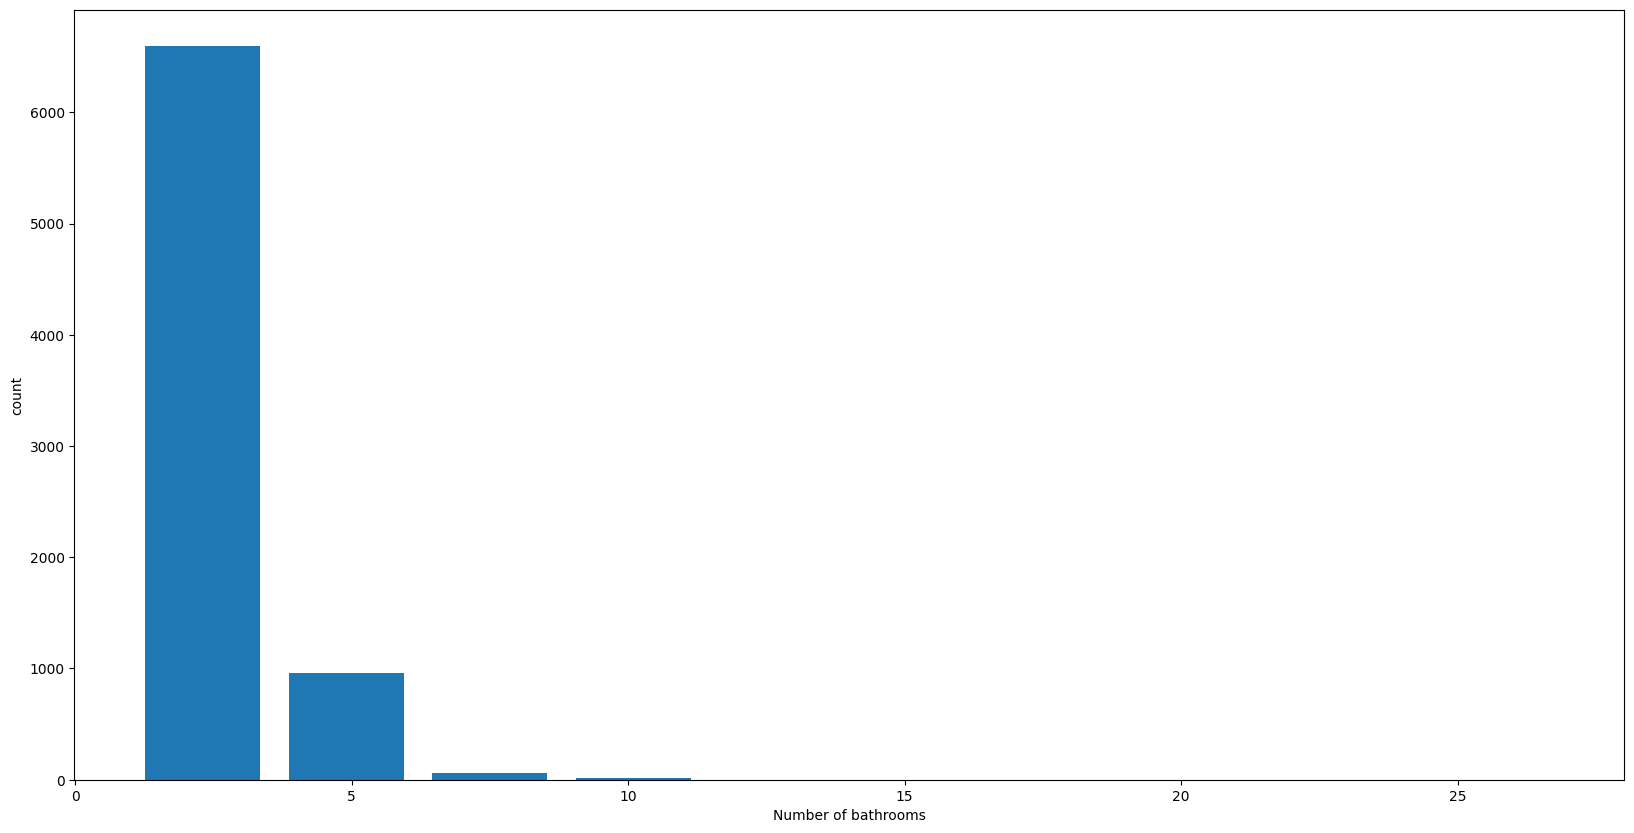

In [42]:
plt.hist(data_5['bath'],rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [43]:
data_6 = data_5[data_5['bath'] < data_5['bhk'] + 2]

In [44]:
data_6.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000
mean,1446.160357,2.488526,1.541451,106.511354,2.583764,6756.452869
std,790.274659,1.089017,0.798629,129.057499,1.111569,3732.084362
min,250.000000,1.000000,0.000000,8.000000,1.000000,1300.000000
25%,1070.000000,2.000000,1.000000,50.000000,2.000000,4599.151231
50%,1240.000000,2.000000,2.000000,75.000000,2.000000,5810.397554
75%,1639.000000,3.000000,2.000000,117.000000,3.000000,7280.846588
max,12000.000000,27.000000,3.000000,2912.000000,27.000000,53150.000000


In [45]:
data_7 = data_6.drop(["size","price_per_sqft"],axis = "columns")

In [46]:
data_7.describe()

,total_sqft,bath,balcony,price,bhk
count,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000
mean,1446.160357,2.488526,1.541451,106.511354,2.583764
std,790.274659,1.089017,0.798629,129.057499,1.111569
min,250.000000,1.000000,0.000000,8.000000,1.000000
25%,1070.000000,2.000000,1.000000,50.000000,2.000000
50%,1240.000000,2.000000,2.000000,75.000000,2.000000
75%,1639.000000,3.000000,2.000000,117.000000,3.000000
max,12000.000000,27.000000,3.000000,2912.000000,27.000000


In [47]:
data_7.describe()

,total_sqft,bath,balcony,price,bhk
count,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000
mean,1446.160357,2.488526,1.541451,106.511354,2.583764
std,790.274659,1.089017,0.798629,129.057499,1.111569
min,250.000000,1.000000,0.000000,8.000000,1.000000
25%,1070.000000,2.000000,1.000000,50.000000,2.000000
50%,1240.000000,2.000000,2.000000,75.000000,2.000000
75%,1639.000000,3.000000,2.000000,117.000000,3.000000
max,12000.000000,27.000000,3.000000,2912.000000,27.000000


In [48]:
data_7.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,17-Dec,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6
3,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,Plot Area,Ready To Move,1st Block Jayanagar,930.0,4.0,2.0,85.0,7


In [49]:
data_8 = data_7.drop(["availability","area_type"],axis=1)

In [50]:
one_hot_encoded = pd.get_dummies(data_8['location']).astype(int)

data_9    = pd.concat([data_8, one_hot_encoded], axis=1)

In [51]:
one_hot_encoded

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
data_10 = data_9.drop(["other"],axis="columns")

In [53]:
data_11 = data_10.drop(["location"],axis="columns")

In [54]:
data_11

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,1800.0,1.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10824,2000.0,2.0,2.0,360.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10825,1140.0,1.0,1.0,185.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10828,1353.0,2.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X = data_11.drop(["price"],axis="columns")

In [56]:
X.head(5)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = data_11["price"]

In [58]:
y

0        428.0
1        194.0
2        125.0
3        235.0
4         85.0
         ...  
10823    200.0
10824    360.0
10825    185.0
10828    110.0
10829     26.0
Name: price, Length: 7539, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [60]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7352520111337528

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(),X,y,cv = cv)

array([0.62949046, 0.69947808, 0.6284778 , 0.65902616, 0.72211166])

In [62]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [63]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [64]:

predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.991910988975164

In [65]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.79043557554996

In [66]:
predict_price('Indira Nagar',1000, 2, 2)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.14393078698268

In [67]:

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))